Numerical integration of the hydrostatic equilibrium equations for an isothermal sphere.

## Required dependencies

We load `numpy`, `scipy.integrate.solve_bvp` to solve a boundary value problem for our system of ODEs, and `matplotlib` for plotting the solutions.

In [2]:
import numpy as np
from scipy.integrate import solve_bvp
from matplotlib import pyplot

## System of equations

Starting from our equation $\frac{1}{\xi^2}\frac{\mathrm{d}}{\mathrm{d}{\xi}}\xi^2 \frac{\mathrm{d}\psi}{\mathrm{d}{\xi}} = e^{-\psi}$ we apply the chain rule to obtain $\frac{2}{\xi}\frac{\mathrm{d}\psi}{\mathrm{d}{\xi}}+ \frac{\mathrm{d}^2\psi}{\mathrm{d}{\xi^2}} = e^{-\psi} \Rightarrow \frac{\mathrm{d}^2\psi}{\mathrm{d}{\xi^2}} = -\frac{2}{\xi}\frac{\mathrm{d}\psi}{\mathrm{d}{\xi}} + e^{-\psi}$.

This allows us to express the system of equations in the way the boundary value solver needs, i.e.

$y_1' = y_2$

$y_2' = -\frac{2}{x} y_2 + e^{-y_1}$

where $y_1 = \psi$; $y_2 = y_1' = \frac{\mathrm{d}\psi}{\mathrm{d}{\xi}}$; $y_2' = \frac{\mathrm{d}^2\psi}{\mathrm{d}{\xi^2}}$.

Now implementing the differential functions.  Here $y$ is an array of the two functions $[y_1, y_2]$ and the function returns the two derivatives, $[y_1',y_2']$.

In [3]:
def GIS(x, y):
  return np.vstack((y[1], -2./x*y[1]+np.exp(-y[0])))


## Boundary conditions

Now we also need to implement the boundary condtions.  At $\xi = x = 0$, we have that $\frac{\mathrm{d}\psi}{\mathrm{d}{\xi}} = y_2 = y_1' = 0$ and also $\psi = y_1 = 0$.  We implement these as a function to minimize (so if the condition was something other than 0 you would return the function $-$ the required value).  ya is the LHS boundary condition, and yb is the RHS boundary condition, which in our case isn't supplied.

In [4]:
def bc(ya, yb):
  return np.array([ya[0], ya[1]])


## Defining the solution grid

We need to specify the $x = \xi$ values we want to solve on.  $x=0$ is problematic because  of the factor of $2/x$ so we just make the first value something very small.  We also need a solution vector of corresponding size.

In [6]:
x=np.linspace(0, 6, 10)
x[0]=1e-10

# Solution vector
y = np.zeros((2, x.size))


## Run the solver

Call the solve_bvp function to solve the system of ODEs, and check it converged.  Status=0 means success.

In [10]:
res = solve_bvp(GIS, bc, x, y)
print(res.status)


0


## Plot the solutions

Define new grids for evaluating the solutions and plot.

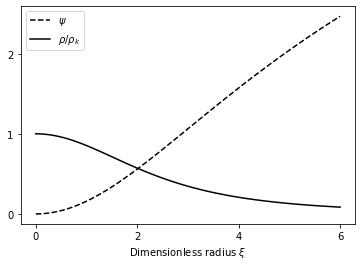

In [11]:
x_plot = np.linspace(0, 6, 100)
y_plot = res.sol(x_plot)
pyplot.plot(x_plot, y_plot[0,:], 'k--', label=r'$\psi$')
pyplot.plot(x_plot, np.exp(-y_plot[0,:]), 'k', label=r'$\rho/\rho_k$')
pyplot.legend(loc='best')
pyplot.xlabel(r'Dimensionless radius $\xi$')

pyplot.gca().set_xticks([0,2,4,6])
pyplot.gca().set_yticks([0, 1, 2])

pyplot.show()


## Calculate and plot mass

Use the solutions to also calculate the dimensionless mass, $m=p_0^{1/2} G^{3/2} M_0/ a_T^4$ as a function of the density contrast $\rho/\rho_k = e^{-\psi}$.

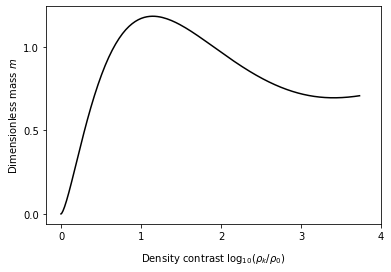

In [13]:
# Define initial mesh
x=np.linspace(0, 100, 100)
# Can't handle x=0 because of the infinity so just make it really small
x[0]=1e-10

# Solution vector
y = np.zeros((2, x.size))

# Run the solver
res = solve_bvp(GIS, bc, x, y)

x_plot = np.linspace(0, 100, 500)
y_plot = res.sol(x_plot)

psi=y_plot[0,:]
xi=x_plot
rho_rat=np.exp(-psi)
dpsi_dxi=y_plot[1,:]
m=1./2/np.sqrt(np.pi)*np.sqrt(rho_rat)*xi**2*dpsi_dxi
pyplot.plot(np.log10(1./rho_rat), m, 'k')
pyplot.xlabel(r'Density contrast $\log_{10}(\rho_k/\rho_0)$', labelpad=10)
pyplot.ylabel(r'Dimensionless mass $m$')
pyplot.gca().set_xticks(np.arange(4.1))
pyplot.gca().set_yticks(np.arange(0,1.5,0.5))


_Download this page [as a Jupyter notebook](https://github.com/vuw-scps/python-physics/raw/master/notebooks/phys417/GIS.ipynb) or as a [standalone Python script](https://github.com/vuw-scps/python-physics/raw/master/scripts/phys417/gis.py)._